##### PROBLEM STATEMENT
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

STEPS INVLOLVED :
- DATA CLEANING
- DATA VISUALIZATION
- MODEL BUILDING
- MODEL EVALUATION

# Data Cleaning

In [263]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm


## Reading the data

In [142]:
Leads = pd.read_csv("Leads.csv")

In [143]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [144]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [145]:
Leads.shape

(9240, 37)

### SPLIT THE COLUMNS TO CATERGORICAL AND NUMERICAL

In [146]:
numerical_cols = Leads.select_dtypes(include='number').columns
categorical_cols = Leads.select_dtypes(exclude='number').columns

In [147]:
categorical_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [148]:
numerical_cols

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [149]:
len(numerical_cols)

7

In [150]:
len(categorical_cols)

30

#### Check the NULL data 

In [151]:
Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [152]:
len(Leads)

9240

In [153]:
## missing value percentage
miss_values = round(Leads.isnull().sum()/len(Leads)*100)
miss_values

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [154]:
#Removing column Prospect ID and Lead Number
Leads.drop('Prospect ID',axis = 1,inplace=True)
Leads.drop('Lead Number',axis = 1,inplace=True)
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### there are data labelled as 'Select', need to replace it with NaN

In [155]:
# Replacing 'Select' value  with NaN
Leads.replace('Select',np.nan,inplace=True)
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [156]:
miss_values = round(Leads.isnull().sum()/len(Leads)*100)
miss_values

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

#### drop the columns with more than 40 percent null data 

In [157]:
cols_to_drop = miss_values[miss_values >= 40].index
cols_to_drop

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [158]:
Leads.drop(columns = cols_to_drop, inplace = True)

In [159]:
Leads.shape

(9240, 27)

In [160]:
Leads["Tags"].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [161]:
Leads["Tags"].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [162]:
tgs_mss = Leads["Tags"].isnull().sum()
tgs_mss/len(Leads)*100

np.float64(36.28787878787879)

### ~36% data missing, created new category named as "Not defined"

In [163]:
Leads["Tags"].fillna("Not defined",inplace =True)

In [164]:
Leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [165]:
Leads["Lead Source"].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [166]:
Leads["TotalVisits"].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
43.0        1
30.0        1
141.0       1
55.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [167]:
Leads["Specialization"].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [168]:
Leads["Specialization"].isnull().sum()

np.int64(3380)

In [169]:
Leads['Specialization'].fillna('Not Specified', inplace=True)

### if catagorical col has less than 30% missing values fill it  mode of the column data

In [170]:
categorical_columns = Leads.select_dtypes(include=["object"]).columns
for column_name in categorical_columns:
    if Leads[column_name].isnull().any():
        mode_value = Leads[column_name].mode()[0]
        Leads[column_name].fillna(mode_value, inplace=True)

In [171]:
Leads.isnull().sum()

Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                      0
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                         

In [172]:
Leads["TotalVisits"].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
43.0        1
30.0        1
141.0       1
55.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [173]:
Leads["TotalVisits"].mean()

np.float64(3.445237833681204)

### Int numerical missing values are replace by mode data instead of mean

In [174]:
Leads["TotalVisits"].fillna(Leads["TotalVisits"].mode()[0], inplace=True)

In [175]:
Leads["Page Views Per Visit"].value_counts()

Page Views Per Visit
0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
         ... 
3.80        1
3.82        1
1.93        1
11.50       1
2.08        1
Name: count, Length: 114, dtype: int64

### float numerical missing values are replace by  mean

In [176]:
Leads["Page Views Per Visit"].fillna(Leads["Page Views Per Visit"].mean(), inplace=True)

In [177]:
Leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

#### All the missing data is cleaned up, filled with mean/mode/default value depending on the data type

In [178]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [179]:
#Leads.to_csv("Lead Data.csv")

# DATA VISUALIZATION

# Analysis using plots

In [180]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [181]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [182]:
Leads.shape

(9240, 27)

In [183]:
Leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [184]:
#user defined function for creating labels inside plots
def label_inside(ctrl = 2, per = 1, vis = None):
    if (ctrl ==0):
        for s in vis.patches:
            vis.annotate(format(s.get_height()*1),
                (s.get_x() + s.get_width() / 2., s.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points',fontweight='bold',fontsize=7)
            
    if (ctrl ==1):
        for s in vis.patches:
            vis.annotate(format(s.get_height()*per, '.1f')+ '%',
                (s.get_x() + s.get_width() / 2., s.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points',fontweight='bold',fontsize=7)
  
    if (ctrl ==2):
        for s in vis.patches:
            vis.annotate(format(s.get_height()*1)+'('+format(s.get_height()*per, '.1f')+ '%)',
                (s.get_x() + s.get_width() / 2., s.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points',fontweight='bold',fontsize=7)

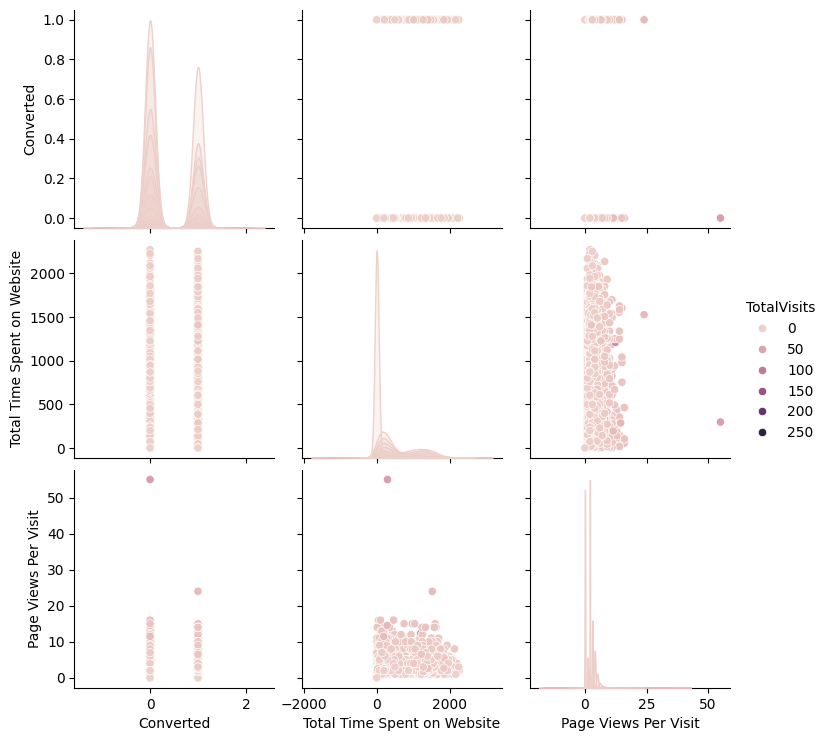

In [185]:
#creating a pairplot 
sns.pairplot(Leads, hue='TotalVisits')
plt.show()

Inference:

The Total visits across all the varibales

In [186]:
# Check unique values in the 'Tags' column
unique_tags = Leads['Tags'].unique()
print(unique_tags)


['Interested in other courses' 'Ringing'
 'Will revert after reading the email' 'Not defined' 'Lost to EINS'
 'In confusion whether part time or DLP' 'Busy' 'switched off'
 'in touch with EINS' 'Already a student' 'Diploma holder (Not Eligible)'
 'Graduation in progress' 'Closed by Horizzon' 'number not provided'
 'opp hangup' 'Not doing further education' 'invalid number'
 'wrong number given' 'Interested  in full time MBA' 'Still Thinking'
 'Lost to Others' 'Shall take in the next coming month' 'Lateral student'
 'Interested in Next batch' 'Recognition issue (DEC approval)'
 'Want to take admission but has financial problems'
 'University not recognized']


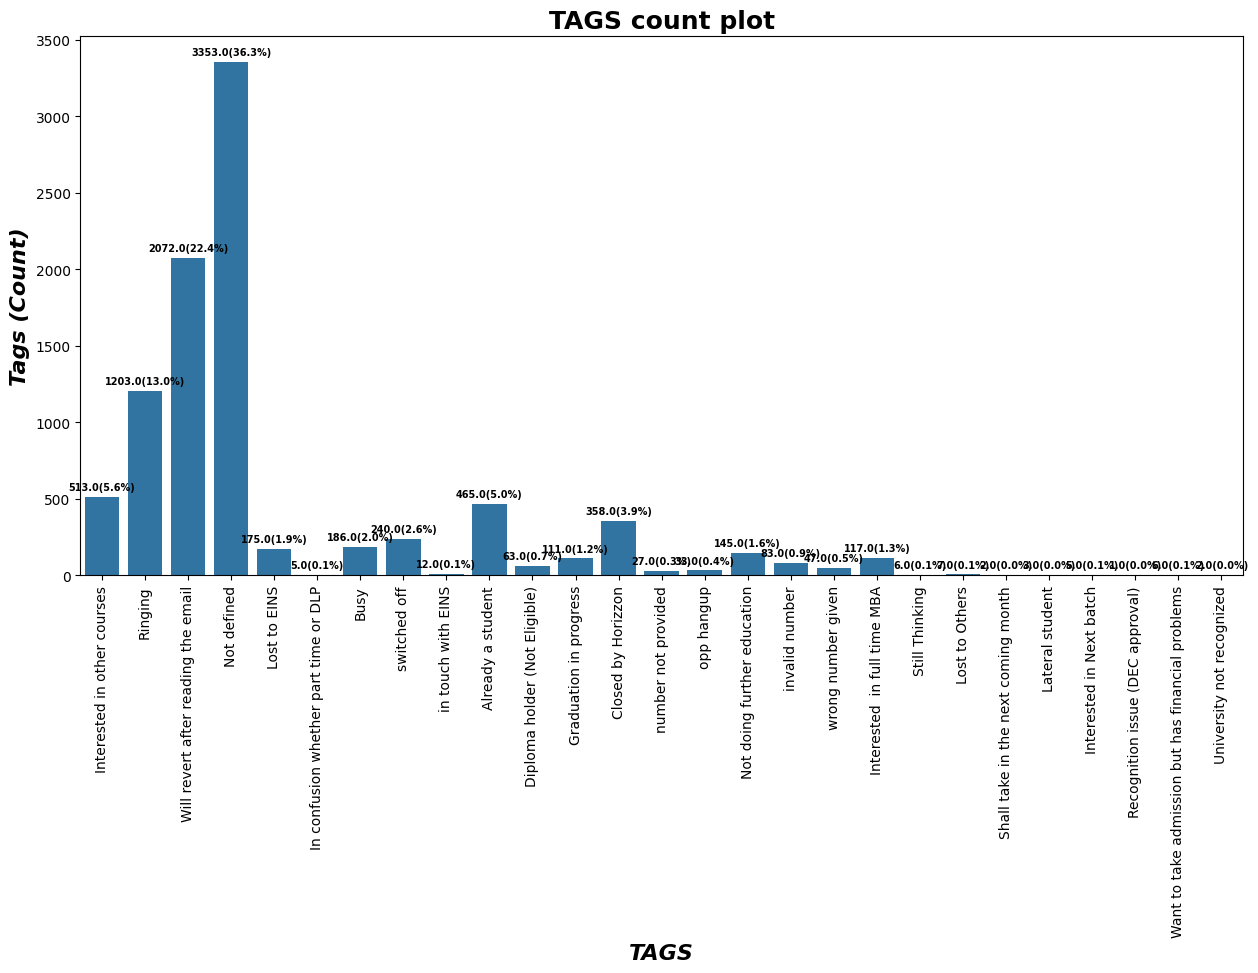

In [187]:
# Visualizing Tags column
plt.figure(figsize=(15,7))
ax =sns.countplot(x = 'Tags', data = Leads)
label_inside(per = 100/len(Leads), vis = ax)
plt.title('TAGS count plot' ,fontsize=18, fontweight='bold')
plt.xlabel('TAGS', fontsize= 16, fontstyle='italic', fontweight='bold')
plt.ylabel('Tags (Count)', fontsize= 16, fontstyle='italic', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

Inference:

1.The highest call status is "Not Defined"

2.The 40% of respondents will revert after reading the email.

3.The 20% of respondents call status is ringing

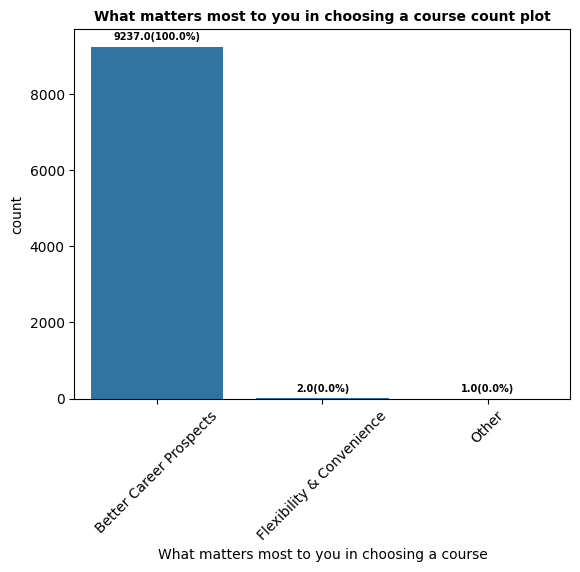

In [188]:
# Visualizing this column
ax=sns.countplot(x = 'What matters most to you in choosing a course', data = Leads)
label_inside(per = 100/len(Leads), vis = ax)
plt.title('What matters most to you in choosing a course count plot' ,fontsize=10, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

Inference:


The Highest Votes for choosing the course is Better Career Prospects

In [189]:
# Finding the percentage of the different categories of this column:
round(Leads['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

What matters most to you in choosing a course
Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: proportion, dtype: float64

In [190]:
# Finding the percentage of the different categories of this column:
round(Leads['What is your current occupation'].value_counts(normalize=True),2)*100

What is your current occupation
Unemployed              90.0
Working Professional     8.0
Student                  2.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: proportion, dtype: float64

# Analysis & Plotting

In [191]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)
Converted = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
Converted

38.53896103896104

The Lead conversion rate is 38%

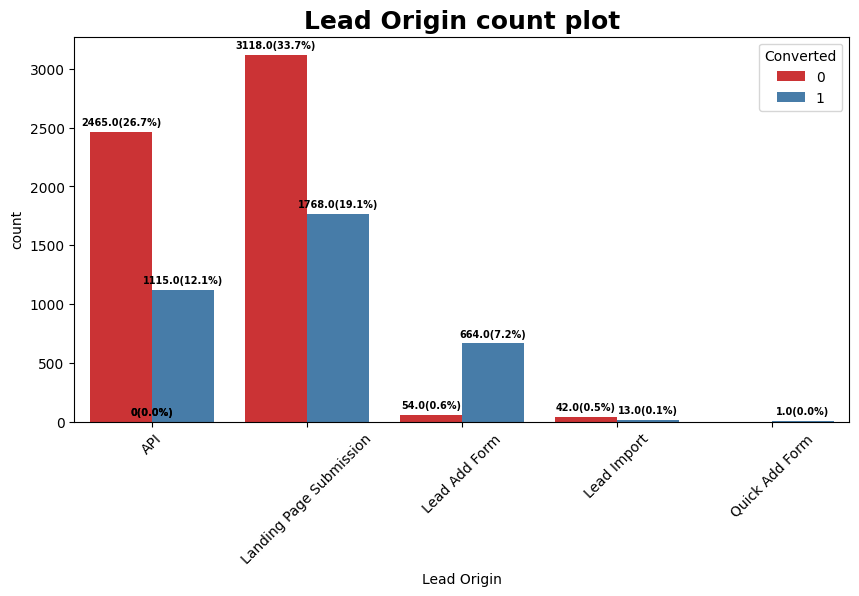

In [192]:
#LEAD ORIGIN

plt.figure(figsize=(10,5))
ax=sns.countplot(x = "Lead Origin", hue = "Converted", data = Leads,palette='Set1')
label_inside(per = 100/len(Leads), vis = ax)
plt.title('Lead Origin count plot' ,fontsize=18, fontweight='bold')
plt.xticks(rotation = 45)
plt.show()

Inference:

1.API and Landing Page Submissions yield a conversion rate of 30-35%, resulting in a substantial number of generated leads.

2.The Lead Add Form boasts an impressive conversion rate exceeding 90%, although the total lead count remains relatively low.

3.Lead Imports contribute very few leads to the overall count.

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

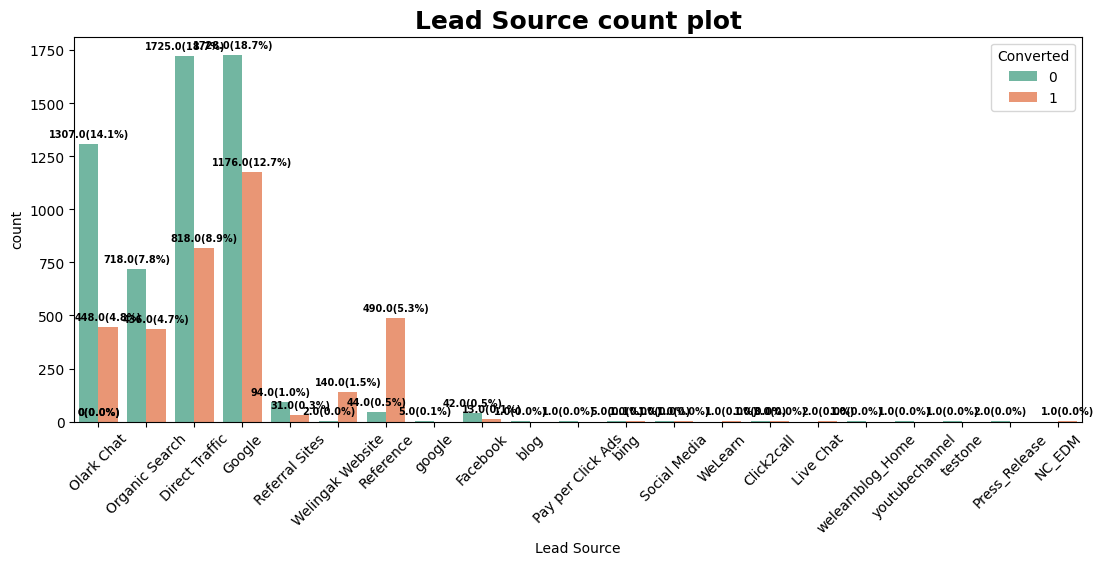

In [193]:
#LEAD SOURCE

plt.figure(figsize=(13,5))
ax=sns.countplot(x = "Lead Source", hue = "Converted", data = Leads, palette='Set2')
label_inside(per = 100/len(Leads), vis = ax)
plt.title('Lead Source count plot' ,fontsize=18, fontweight='bold')
plt.xticks(rotation = 45)
plt.show()

In [194]:
# Need to replace 'google' with 'Google'
Leads['Lead Source'] = Leads['Lead Source'].replace(['google'], 'Google')

In [195]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
Leads['Lead Source'] = Leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [196]:
Leads['Lead Source'].value_counts()

Lead Source
Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: count, dtype: int64

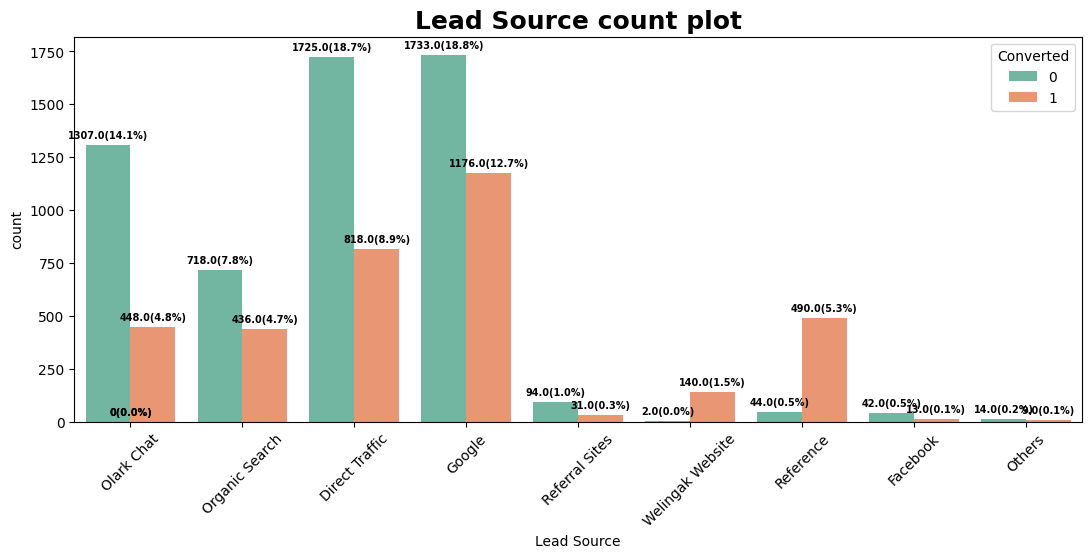

In [197]:
# Visualizing again

plt.figure(figsize=(13,5))
ax=sns.countplot(x = "Lead Source", hue = "Converted", data = Leads, palette='Set2')
label_inside(per = 100/len(Leads), vis = ax)
plt.title('Lead Source count plot' ,fontsize=18, fontweight='bold')
plt.xticks(rotation = 45)
plt.show()

Inference:

1.The most substantial number of leads is generated through Google and Direct traffic sources.

2.The conversion rate for reference leads and leads originating from the Welingak website is notably high.

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

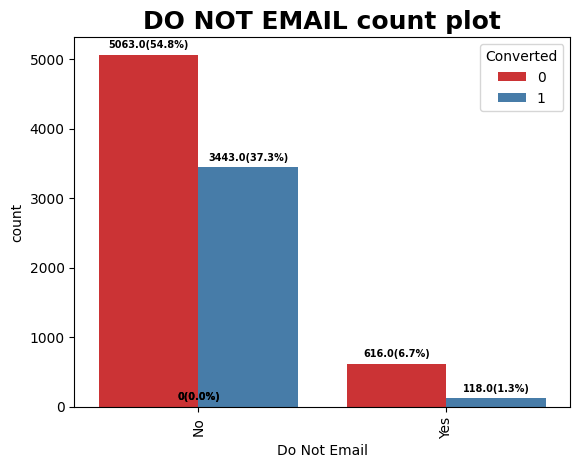

In [198]:
#DO NOT EMAIL

ax=sns.countplot(x = "Do Not Email", hue = "Converted", data = Leads,palette='Set1')
label_inside(per = 100/len(Leads), vis = ax)
plt.title('DO NOT EMAIL count plot' ,fontsize=18, fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

Inference:

Most of the entries are 'NO' No Inference can be drawn with this parameter.
37 percent of them got conversion


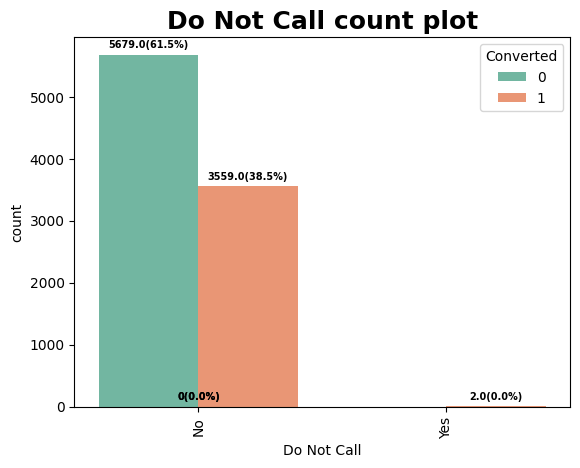

In [199]:
#DO NOT CALL

ax=sns.countplot(x = "Do Not Call", hue = "Converted", data = Leads,palette='Set2')
label_inside(per = 100/len(Leads), vis = ax)
plt.title('Do Not Call count plot' ,fontsize=18, fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

Inference:

Most entries are 'No'. No Inference can be drawn with this parameter.

38 percent of the got the conversion

In [200]:
#TOTAL VISITS

Leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
5%          0.000000
25%         0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

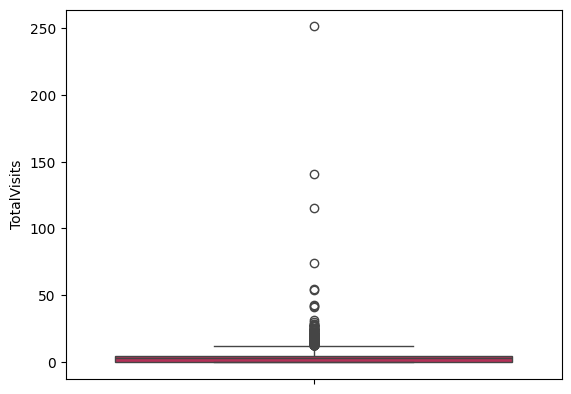

In [201]:
sns.boxplot(Leads['TotalVisits'],orient='vert',palette='rocket')
plt.show()

Inference:

As we can see there are a considerable number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [202]:
percentiles = Leads['TotalVisits'].quantile([0.05,0.95]).values
Leads['TotalVisits'][Leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
Leads['TotalVisits'][Leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

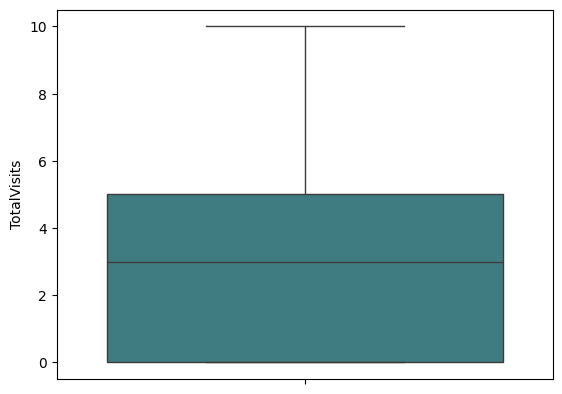

In [203]:
# Visualizing again
sns.boxplot(Leads['TotalVisits'],orient='vert',palette='crest')
plt.show()

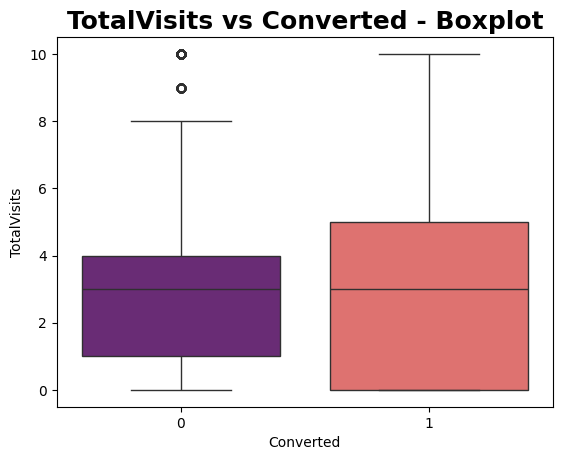

In [204]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Leads,palette='magma')
plt.title('TotalVisits vs Converted - Boxplot' ,fontsize=18, fontweight='bold')
plt.show()

Inference:

Median for converted and Not converted leads are the same.

Not much can be concluded on the basis of Total Visits.

In [205]:
#TOTAL TIME SPENT ON WEBSITE

Leads['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

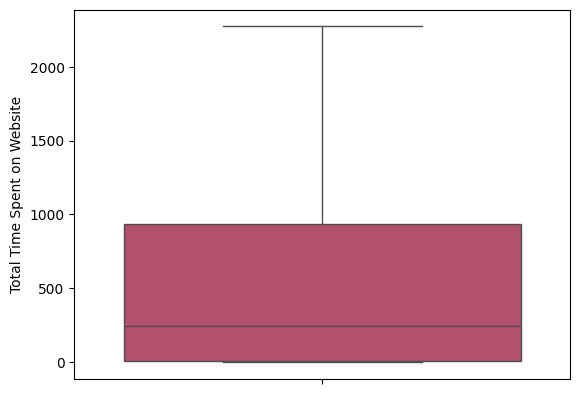

In [206]:
sns.boxplot(Leads['Total Time Spent on Website'],orient='vert',palette='flare')
plt.show()

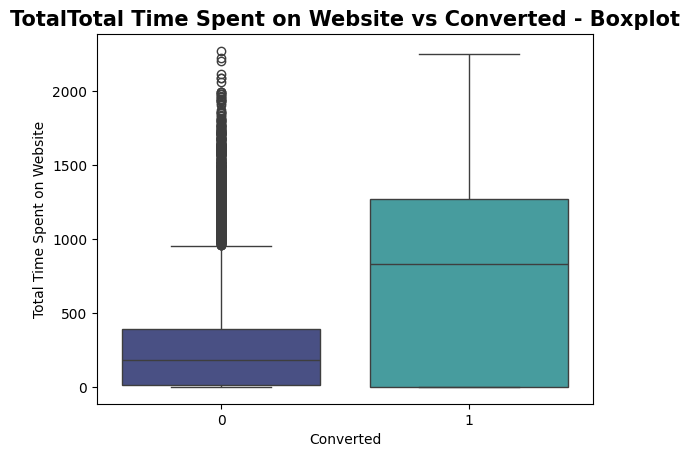

In [207]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Leads,palette='mako')
plt.title('TotalTotal Time Spent on Website vs Converted - Boxplot' ,fontsize=15, fontweight='bold')
plt.show()

Inference:

Leads  spend more time on the website are more likely to be converted.

Company should focus on the Website and it should be made more engaging to make leads.

In [208]:
#PAGE VIEW PER VISIT

Leads['Page Views Per Visit'].describe()

count    9240.000000
mean        2.362820
std         2.145333
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

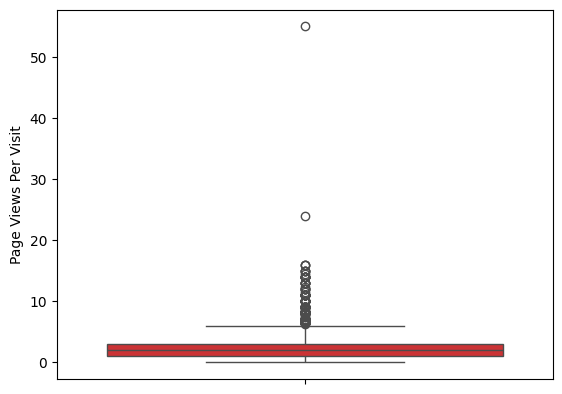

In [209]:
sns.boxplot(Leads['Page Views Per Visit'],orient='vert',palette='Set1')
plt.show()

Inference:

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [210]:
percentiles = Leads['Page Views Per Visit'].quantile([0.05,0.95]).values
Leads['Page Views Per Visit'][Leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
Leads['Page Views Per Visit'][Leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

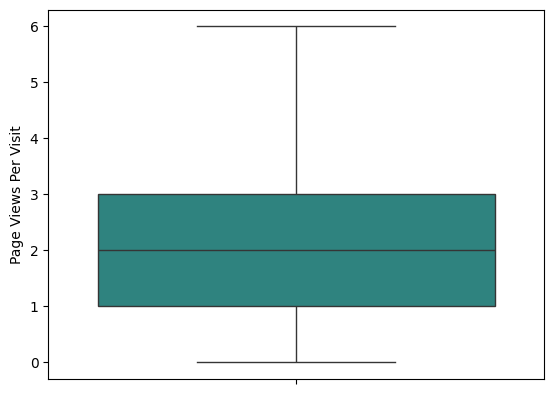

In [211]:
# Visualizing again
sns.boxplot(Leads['Page Views Per Visit'],palette='viridis',orient='vert')
plt.show()

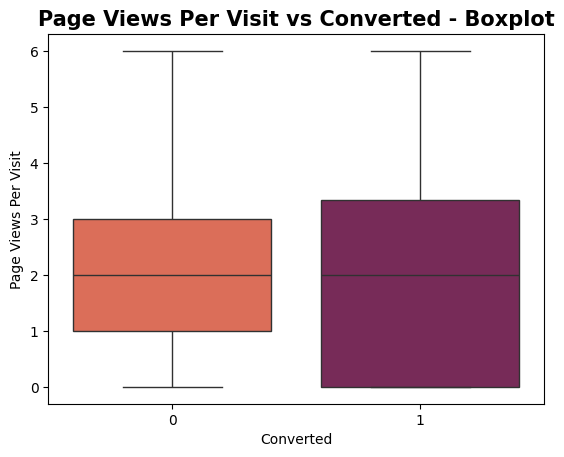

In [212]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =Leads,palette='rocket_r')
plt.title('Page Views Per Visit vs Converted - Boxplot' ,fontsize=15, fontweight='bold')
plt.show()

Inference:

Median for converted and unconverted leads is the same.

Not much can inferred specifically for lead conversion from Page Views Per Visit

In [213]:
#LAST ACTIVITY

Leads['Last Activity'].describe()

count             9240
unique              17
top       Email Opened
freq              3540
Name: Last Activity, dtype: object

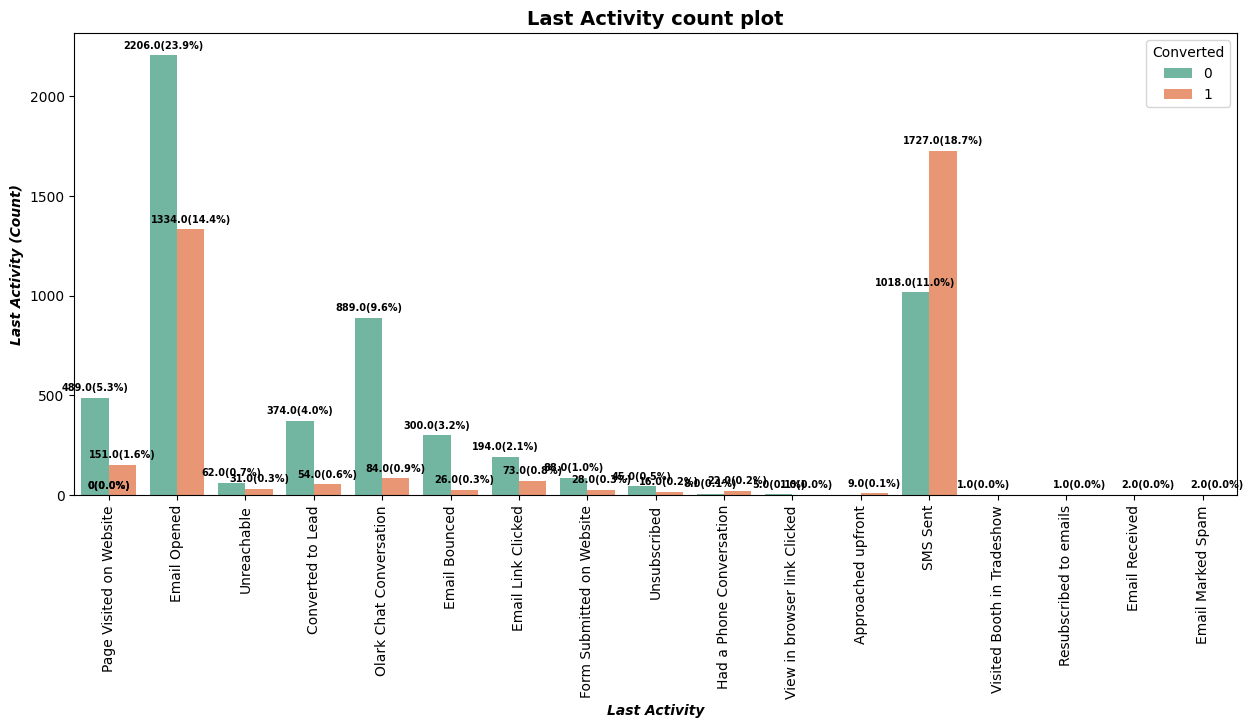

In [214]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x = "Last Activity", hue = "Converted", data = Leads,palette='Set2')
label_inside(per = 100/len(Leads), vis = ax)
plt.title('Last Activity count plot' ,fontsize=14, fontweight='bold')
plt.xlabel('Last Activity', fontsize= 10, fontstyle='italic', fontweight='bold')
plt.ylabel('Last Activity (Count)', fontsize= 10, fontstyle='italic', fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

In [215]:
# We can club the last activities to "Other_Activity" which are having less data.
Leads['Last Activity'] = Leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

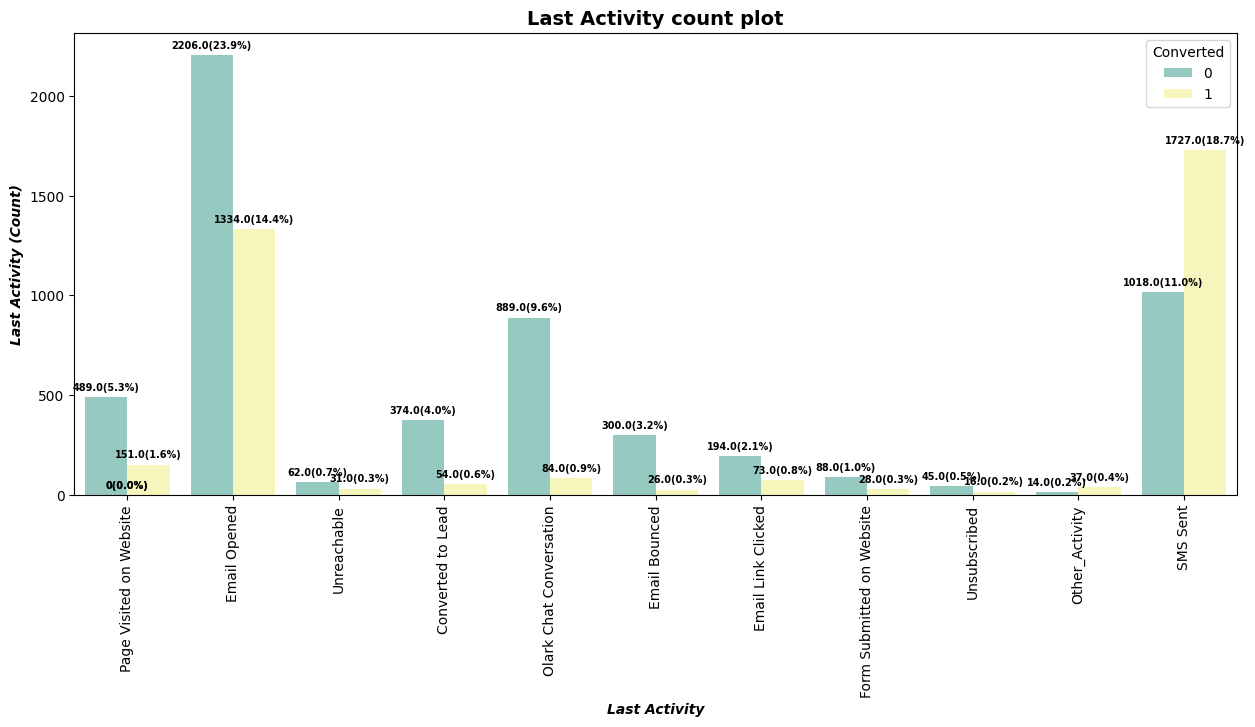

In [216]:
# Visualizing again
plt.figure(figsize=(15,6))
ax=sns.countplot(x = "Last Activity", hue = "Converted", data = Leads,palette='Set3')
label_inside(per = 100/len(Leads), vis = ax)
plt.title('Last Activity count plot' ,fontsize=14, fontweight='bold')
plt.xlabel('Last Activity', fontsize= 10, fontstyle='italic', fontweight='bold')
plt.ylabel('Last Activity (Count)', fontsize= 10, fontstyle='italic', fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

Inference:
    
Most of the lead have their Email opened as their last activity.

Conversion rate for leads with last activity as SMS Sent is almost 60%.

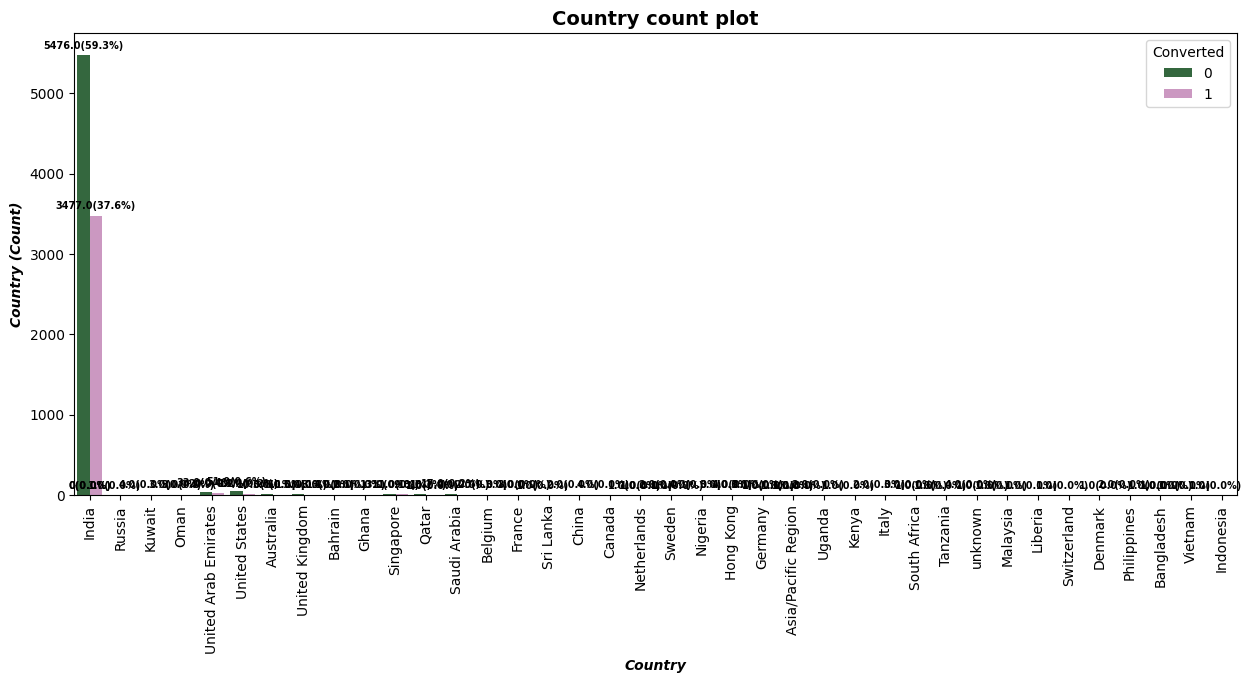

In [217]:
#COUNTRY

plt.figure(figsize=(15,6))
ax=sns.countplot(x = "Country", hue = "Converted", data = Leads,palette='cubehelix')
label_inside(per = 100/len(Leads), vis = ax)
plt.title('Country count plot' ,fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize= 10, fontstyle='italic', fontweight='bold')
plt.ylabel('Country (Count)', fontsize= 10, fontstyle='italic', fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

Inference:

Most values are 'India' no such inference can be drawn

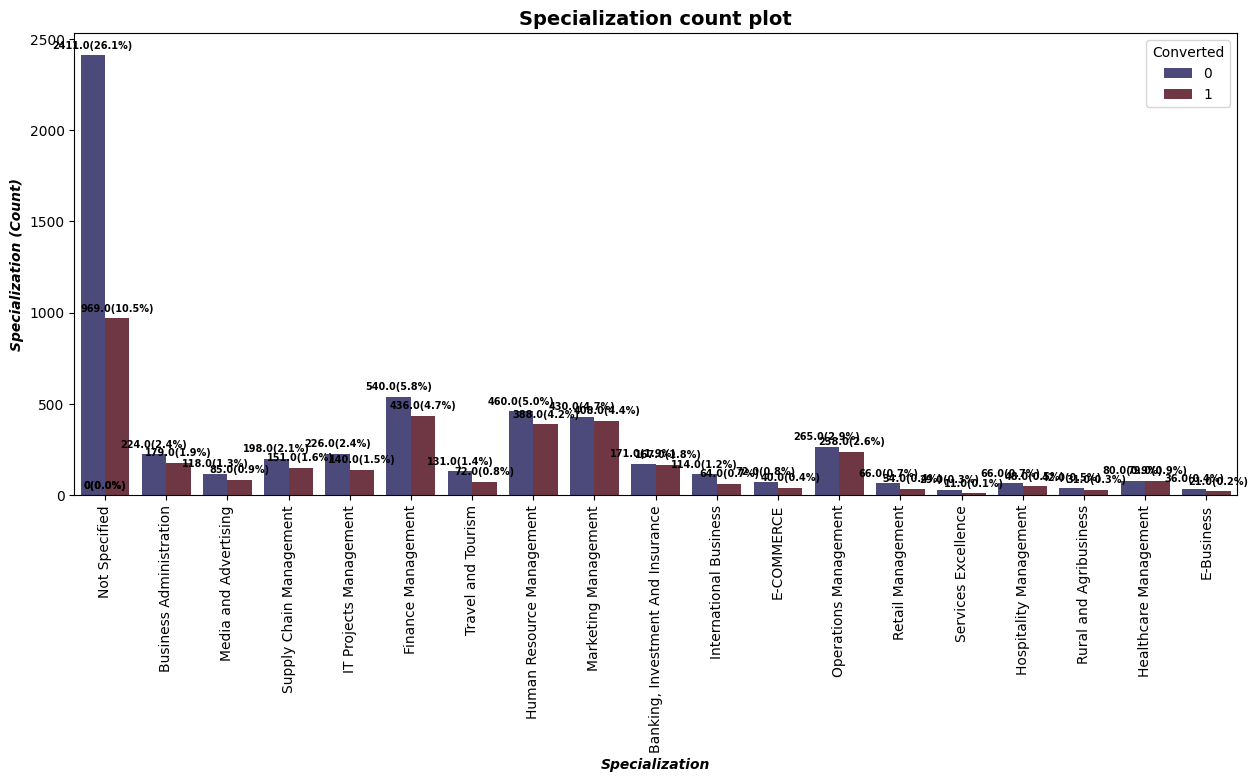

In [218]:
#SPECIALIZATION

plt.figure(figsize=(15,6))
ax=sns.countplot(x = "Specialization", hue = "Converted", data = Leads,palette='icefire')
label_inside(per = 100/len(Leads), vis = ax)
plt.title('Specialization count plot' ,fontsize=14, fontweight='bold')
plt.xlabel('Specialization', fontsize= 10, fontstyle='italic', fontweight='bold')
plt.ylabel('Specialization (Count)', fontsize= 10, fontstyle='italic', fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

Inference:

Every Specialisation have contributed to the lead, more focus should be given

The industry domain in which the customer worked before. Includes the level 'Not Specified' which means the customer had not specified this option while filling the form.


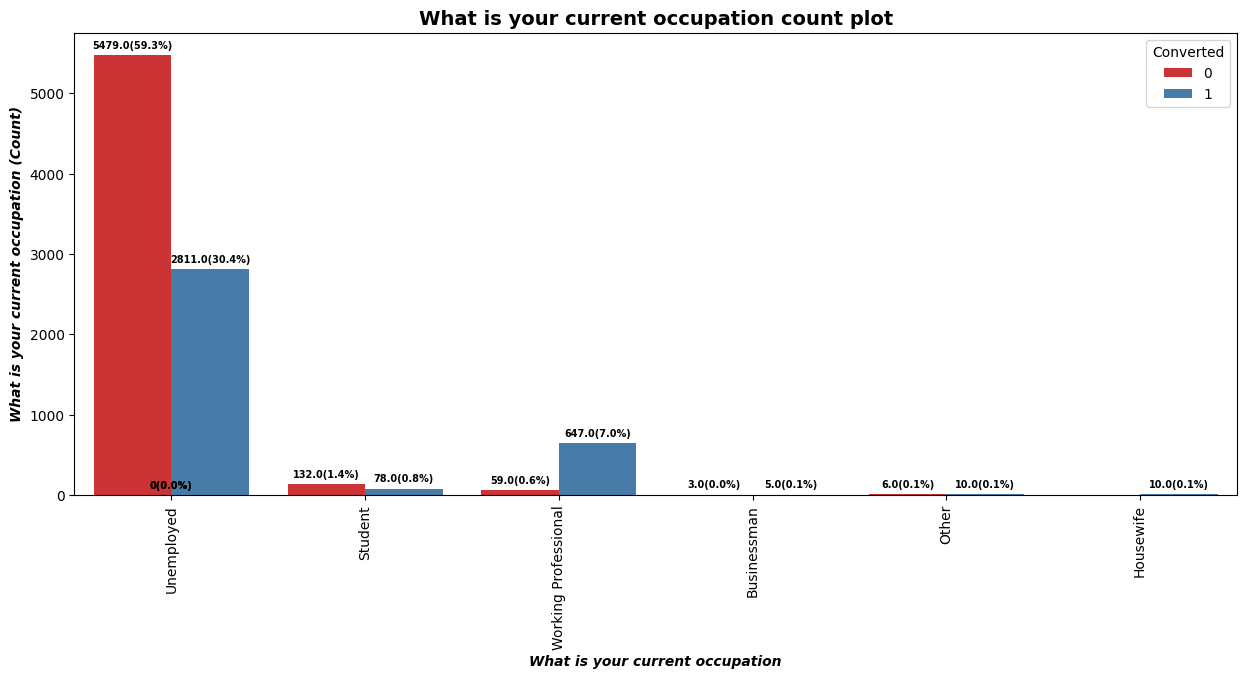

In [219]:
#WHAT IS YOUR CURRENT OCCUPATION

plt.figure(figsize=(15,6))
ax=sns.countplot(x = "What is your current occupation", hue = "Converted", data = Leads,palette='Set1')
label_inside(per = 100/len(Leads), vis = ax)
plt.title('What is your current occupation count plot' ,fontsize=14, fontweight='bold')
plt.xlabel('What is your current occupation', fontsize= 10, fontstyle='italic', fontweight='bold')
plt.ylabel('What is your current occupation (Count)', fontsize= 10, fontstyle='italic', fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

Inference:

1.Working Professionals have high chances getting conversion

2.Unemployed leads are the most in numbers but has around 30-35% conversion rate.

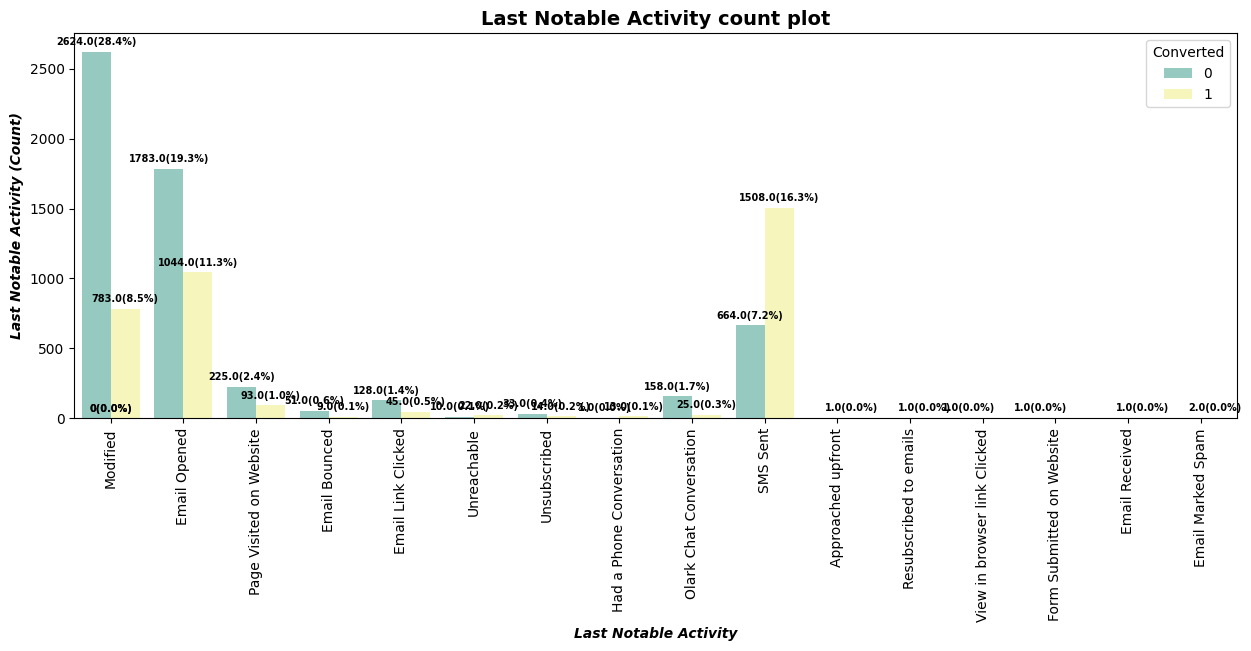

In [220]:
#LAST NOTABLE ACTIVITY

plt.figure(figsize=(15,5))
ax=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = Leads,palette='Set3')
label_inside(per = 100/len(Leads), vis = ax)
plt.title('Last Notable Activity count plot' ,fontsize=14, fontweight='bold')
plt.xlabel('Last Notable Activity', fontsize= 10, fontstyle='italic', fontweight='bold')
plt.ylabel('Last Notable Activity (Count)', fontsize= 10, fontstyle='italic', fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

Results:

Based on the analysis we have seen that most columns are not adding any information to the model, hence drop them for further analysis

In [221]:
Leads = Leads.drop(['Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],axis=1)

In [222]:
Leads.shape

(9240, 13)

In [223]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Specialization                                 9240 

#### Converting some binary variables (Yes/No) to 1/0

In [225]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

Leads[vars] = Leads[vars].apply(binary_map)

In [227]:
Leads[vars].value_counts()

Do Not Email  Do Not Call
0             0              8504
1             0               734
0             1                 2
Name: count, dtype: int64

# Creating Dummy Variables for the categorical features

'Lead Origin' 

'Lead Source' 

'Last Activity' 
'Specialization' 

'How did you hear about X Education' 

'What is your current occupation'

'What matters most to you in choosing a course'

'Lead Profile'

'City'

'Last Notable Activity'


In [228]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Specialization                                 9240 

In [229]:
Leads.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Last Activity                                  9240 non-null   object
 3   Specialization                                 9240 non-null   object
 4   What is your current occupation                9240 non-null   object
 5   What matters most to you in choosing a course  9240 non-null   object
 6   Last Notable Activity                          9240 non-null   object
dtypes: object(7)
memory usage: 505.4+ KB


In [230]:
Leads.select_dtypes(include='object').columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

In [231]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(Leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']], drop_first=True).astype(int)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [232]:
dummy_data.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
  

In [233]:
Leads_new=Leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','What matters most to you in choosing a course',
                             'Last Notable Activity'],axis=1)

In [234]:
Leads_new.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [235]:
Leads_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Do Not Email                 9240 non-null   int64  
 1   Do Not Call                  9240 non-null   int64  
 2   Converted                    9240 non-null   int64  
 3   TotalVisits                  9240 non-null   float64
 4   Total Time Spent on Website  9240 non-null   int64  
 5   Page Views Per Visit         9240 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 433.3 KB


### Converting the numerical data into int datatype

In [236]:
Leads_new['TotalVisits']=Leads_new['TotalVisits'].astype(int)

In [237]:
Leads_new['Page Views Per Visit']=Leads_new['Page Views Per Visit'].astype(int)

In [238]:
Leads_new['TotalVisits'].value_counts()


TotalVisits
0     2326
2     1680
3     1306
4     1120
5      783
10     467
6      466
1      395
7      309
8      224
9      164
Name: count, dtype: int64

In [239]:

Leads_new['Page Views Per Visit'].value_counts()

Page Views Per Visit
2    2372
0    2189
3    1360
1    1212
4     956
6     604
5     547
Name: count, dtype: int64

In [240]:
Leads_new=pd.concat([Leads_new,dummy_data],axis=1)

In [241]:
Leads_new.shape

(9240, 68)

In [242]:
Leads_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 68 columns):
 #   Column                                                                   Non-Null Count  Dtype
---  ------                                                                   --------------  -----
 0   Do Not Email                                                             9240 non-null   int64
 1   Do Not Call                                                              9240 non-null   int64
 2   Converted                                                                9240 non-null   int64
 3   TotalVisits                                                              9240 non-null   int64
 4   Total Time Spent on Website                                              9240 non-null   int64
 5   Page Views Per Visit                                                     9240 non-null   int64
 6   Lead Origin_Landing Page Submission                                      9240 non-null  

In [243]:
Leads_new.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5,674,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2,1532,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,305,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2,1428,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Feature Scaling

Scaling the  numerical columns in the dataset which have different scales.
I'm   scaling the data using  Standard Scaler.

In [244]:
# Import Standard scaler
from sklearn.preprocessing import StandardScaler

In [245]:
# Scale the three numeric features present in the dataset
scaler = StandardScaler()
Leads_new[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(Leads_new[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
Leads_new.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,-1.124516,-0.889974,-1.226489,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0.669119,0.339972,-0.105488,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,-0.407062,1.905689,-0.105488,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,-0.765789,-0.333396,-0.665988,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,-0.407062,1.715905,-0.665988,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [246]:
Leads_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 68 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   float64
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Lead Origin_Landing Page Submission                                     

### **Feature Selection**

### **Feature  Importance**

<Axes: >

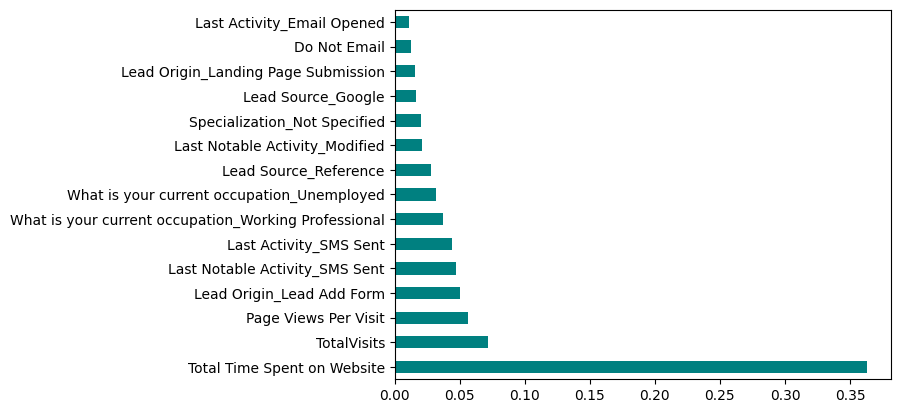

In [247]:
x=Leads_new.drop(['Converted'],axis=1)
#Target Variable
y=Leads_new['Converted']

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x, y)

(pd.Series(model.feature_importances_, index=x.columns)
   .nlargest(15)
   .plot(kind='barh',color='teal'))

**Dealing with Multicollinearity problem**(When  Independent vriables are correlated)

In [248]:
correlations = Leads_new.corr()
correlations = correlations.where(np.triu(np.ones(correlations.shape, dtype=bool), k=1))
correlations = correlations.unstack().reset_index()
correlations.columns = ['VAR1', 'VAR2', 'Correlation']
correlations.dropna(subset=["Correlation"], inplace=True)
correlations["Correlation"] = correlations["Correlation"].abs()
correlations.sort_values(by='Correlation', ascending=False, inplace=True)
correlations.head(15)

,VAR1,VAR2,Correlation
688,Lead Source_Facebook,Lead Origin_Lead Import,0.981709
4515,Last Notable Activity_Unsubscribed,Last Activity_Unsubscribed,0.877108
1027,Lead Source_Reference,Lead Origin_Lead Add Form,0.853237
4377,Last Notable Activity_SMS Sent,Last Activity_SMS Sent,0.852707
3449,What is your current occupation_Working Profes...,What is your current occupation_Unemployed,0.849653
3828,Last Notable Activity_Email Opened,Last Activity_Email Opened,0.842496
3691,Last Notable Activity_Email Link Clicked,Last Activity_Email Link Clicked,0.800764
2658,Specialization_Not Specified,Lead Origin_Landing Page Submission,0.748263
343,Page Views Per Visit,TotalVisits,0.718284
4240,Last Notable Activity_Page Visited on Website,Last Activity_Page Visited on Website,0.692057


### Dropping highly correlated  variables

In [249]:

Leads_new1=Leads_new.drop(['Lead Origin_Lead Import','Last Activity_Unsubscribed','Lead Source_Reference','Last Activity_SMS Sent','Last Activity_Email Opened','Last Activity_Email Link Clicked','Page Views Per Visit','Last Activity_Page Visited on Website','Last Activity_Email Bounced','Last Activity_Unreachable','Last Activity_Other_Activity', 'Specialization_Not Specified'],axis=1)

In [250]:
correlations = Leads_new1.corr()

correlations = correlations.where(np.triu(np.ones(correlations.shape, dtype=bool), k=1))
correlations = correlations.unstack().reset_index()
correlations.columns = ['VAR1', 'VAR2', 'Correlation']
correlations.dropna(subset=["Correlation"], inplace=True)
correlations["Correlation"] = correlations["Correlation"].abs()
correlations.sort_values(by='Correlation', ascending=False, inplace=True)
correlations.head(10)

,VAR1,VAR2,Correlation
2165,What is your current occupation_Working Profes...,What is your current occupation_Unemployed,0.849653
565,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,0.512950
2732,Last Notable Activity_Modified,Last Notable Activity_Email Opened,0.507426
563,Lead Source_Olark Chat,TotalVisits,0.488196
283,Lead Origin_Landing Page Submission,TotalVisits,0.466082
2108,What is your current occupation_Unemployed,What is your current occupation_Student,0.450486
790,Lead Source_Welingak Website,Lead Origin_Lead Add Form,0.430407
906,Last Activity_Olark Chat Conversation,Lead Source_Olark Chat,0.426248
2960,Last Notable Activity_SMS Sent,Last Notable Activity_Modified,0.423664
2760,Last Notable Activity_Olark Chat Conversation,Last Activity_Olark Chat Conversation,0.414334


<Axes: >

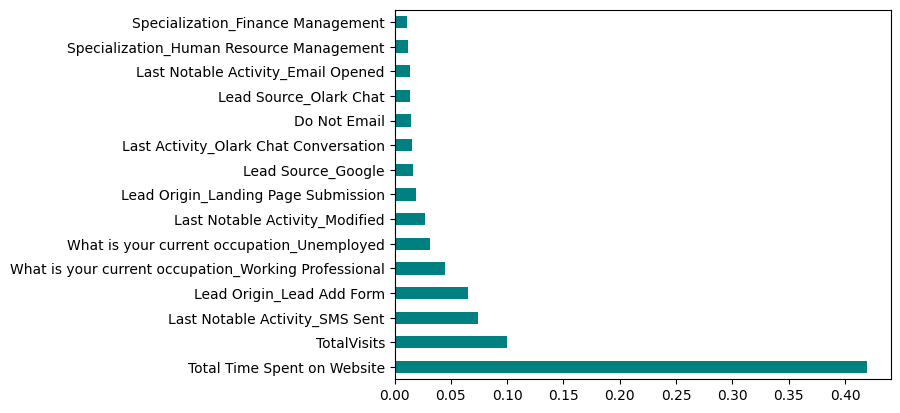

In [251]:
x=Leads_new1.drop(['Converted'],axis=1)
#Target Variable
y=Leads_new1['Converted']
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x, y)

(pd.Series(model.feature_importances_, index=x.columns)
   .nlargest(15)
   .plot(kind='barh',color='teal'))

In [322]:
#Leads_new1.to_csv("scaled_data.csv")

# Training and Testing the Data

In [252]:
Leads_new1.shape

(9240, 56)

In [253]:
from sklearn.model_selection import train_test_split

X=Leads_new1.drop(['Converted'],axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,-1.124516,-0.889974,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0.669119,0.339972,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,-0.407062,1.905689,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,-0.765789,-0.333396,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,-0.407062,1.715905,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [254]:
y=Leads_new1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [255]:
X.shape

(9240, 55)

In [256]:
y.shape

(9240,)

### split the data to train and test

In [257]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

## LOGISTIC REGRESSION MODEL is used for evaluation and decision

In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Assuming logreg is your Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # You can adjust parameters as needed

# Assuming X_train and y_train are your training data
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit the RFE model to your data
rfe.fit(X_train, y_train)

# Selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)



Selected Features: Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [259]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('Do Not Email', np.True_, np.int64(1)),
 ('Do Not Call', np.False_, np.int64(21)),
 ('TotalVisits', np.False_, np.int64(28)),
 ('Total Time Spent on Website', np.True_, np.int64(1)),
 ('Lead Origin_Landing Page Submission', np.False_, np.int64(8)),
 ('Lead Origin_Lead Add Form', np.True_, np.int64(1)),
 ('Lead Origin_Quick Add Form', np.False_, np.int64(31)),
 ('Lead Source_Facebook', np.False_, np.int64(29)),
 ('Lead Source_Google', np.False_, np.int64(26)),
 ('Lead Source_Olark Chat', np.True_, np.int64(1)),
 ('Lead Source_Organic Search', np.False_, np.int64(39)),
 ('Lead Source_Others', np.False_, np.int64(25)),
 ('Lead Source_Referral Sites', np.False_, np.int64(35)),
 ('Lead Source_Welingak Website', np.True_, np.int64(1)),
 ('Last Activity_Form Submitted on Website', np.False_, np.int64(23)),
 ('Last Activity_Olark Chat Conversation', np.True_, np.int64(1)),
 ('Specialization_Business Administration', np.False_, np.int64(19)),
 ('Specialization_E-Business', np.False_, np.int64

In [260]:
col = selected_features

X_train = X_train[col]



In [261]:
X_train.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

### MODEL 1 

In [264]:
# fit a logistic regression model on xtrain and after adding a constant and output sum

import statsmodels.api as sm

# Assuming X_train and y_train are your training data
X_train_sm = sm.add_constant(X_train)

# Creating a logistic regression model
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fitting the model
res = logm2.fit()

# Displaying the summary
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2721.0
Date:                Thu, 17 Oct 2024   Deviance:                       5442.0
Time:                        21:51:05   Pearson chi2:                 7.27e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3861
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### VIF 

In [265]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train is your feature matrix
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Round VIF values to 2 decimal places
#vif_data["VIF"] = vif_data["VIF"]

# Display the VIF data
print(vif_data)



                                             Variable       VIF
0                                        Do Not Email  1.102343
1                         Total Time Spent on Website  1.247318
2                           Lead Origin_Lead Add Form  1.464327
3                              Lead Source_Olark Chat  1.755560
4                        Lead Source_Welingak Website  1.238840
5               Last Activity_Olark Chat Conversation  1.422282
6               Specialization_Rural and Agribusiness  1.010912
7           What is your current occupation_Housewife  1.006078
8             What is your current occupation_Student  1.026956
9          What is your current occupation_Unemployed  1.877573
10  What is your current occupation_Working Profes...  1.219085
11           Last Notable Activity_Email Link Clicked  1.038297
12     Last Notable Activity_Had a Phone Conversation  1.003723
13                     Last Notable Activity_SMS Sent  1.420129
14                  Last Notable Activit

Drop the `What is your current occupation_Housewife` based on the p value

In [266]:
cols_to_drop = ['What is your current occupation_Housewife']
X_train.drop(columns = cols_to_drop, inplace = True)

### MODEL 2

In [267]:
# Refit the model with the new set of features
# fit a logistic regression model on xtrain and after adding a constant and output sum

import statsmodels.api as sm

# Assuming X_train and y_train are your training data
X_train_sm = sm.add_constant(X_train)

# Creating a logistic regression model
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fitting the model
res = logm3.fit()

# Displaying the summary
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2725.8
Date:                Thu, 17 Oct 2024   Deviance:                       5451.6
Time:                        21:52:24   Pearson chi2:                 7.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3852
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [268]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train is your feature matrix
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Round VIF values to 2 decimal places
vif_data["VIF"] = vif_data["VIF"].round(2)

# Display the VIF data
print(vif_data)

                                             Variable   VIF
0                                        Do Not Email  1.10
1                         Total Time Spent on Website  1.25
2                           Lead Origin_Lead Add Form  1.46
3                              Lead Source_Olark Chat  1.76
4                        Lead Source_Welingak Website  1.24
5               Last Activity_Olark Chat Conversation  1.42
6               Specialization_Rural and Agribusiness  1.01
7             What is your current occupation_Student  1.03
8          What is your current occupation_Unemployed  1.88
9   What is your current occupation_Working Profes...  1.22
10           Last Notable Activity_Email Link Clicked  1.04
11     Last Notable Activity_Had a Phone Conversation  1.00
12                     Last Notable Activity_SMS Sent  1.42
13                  Last Notable Activity_Unreachable  1.01


Drop the `Last Notable Activity_Email Link Clicked` based on the p value

In [269]:
#column_to_drop = ['Last Notable Activity_Email Marked Spam']
#column_to_drop =['What is your current occupation_Working Professional']
column_to_drop =['Last Notable Activity_Email Link Clicked']

X_train.drop(columns=column_to_drop, inplace=True)


### MODEL 3

In [270]:
import statsmodels.api as sm

# Assuming X_train and y_train are your training data
X_train_sm = sm.add_constant(X_train)

# Creating a logistic regression model
logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fitting the model
res = logm4.fit()

# Displaying the summary
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2726.7
Date:                Thu, 17 Oct 2024   Deviance:                       5453.4
Time:                        21:58:49   Pearson chi2:                 7.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3851
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [271]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train is your feature matrix
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Round VIF values to 2 decimal places
vif_data["VIF"] = vif_data["VIF"].round(2)

# Display the VIF data
print(vif_data)

                                             Variable   VIF
0                                        Do Not Email  1.10
1                         Total Time Spent on Website  1.25
2                           Lead Origin_Lead Add Form  1.46
3                              Lead Source_Olark Chat  1.75
4                        Lead Source_Welingak Website  1.24
5               Last Activity_Olark Chat Conversation  1.41
6               Specialization_Rural and Agribusiness  1.01
7             What is your current occupation_Student  1.03
8          What is your current occupation_Unemployed  1.84
9   What is your current occupation_Working Profes...  1.22
10     Last Notable Activity_Had a Phone Conversation  1.00
11                     Last Notable Activity_SMS Sent  1.41
12                  Last Notable Activity_Unreachable  1.00


Drop the `What is your current occupation_Student` based on the p value

In [272]:
column_to_drop =['What is your current occupation_Student']

X_train.drop(columns=column_to_drop, inplace=True)

In [345]:
#column_to_drop = ['Last Notable Activity_Resubscribed to emails', 'What matters most to you in choosing a course_Flexibility & Convenience']

#X_train.drop(columns=column_to_drop, inplace=True)

### MODEL 4

In [273]:
import statsmodels.api as sm

# Assuming X_train and y_train are your training data
X_train_sm = sm.add_constant(X_train)

# Creating a logistic regression model
logm5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fitting the model
res = logm5.fit()

# Displaying the summary
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2727.8
Date:                Thu, 17 Oct 2024   Deviance:                       5455.5
Time:                        22:02:04   Pearson chi2:                 7.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3849
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [274]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train is your feature matrix
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Round VIF values to 2 decimal places
vif_data["VIF"] = vif_data["VIF"].round(2)

# Display the VIF data
print(vif_data)

                                             Variable   VIF
0                                        Do Not Email  1.10
1                         Total Time Spent on Website  1.24
2                           Lead Origin_Lead Add Form  1.45
3                              Lead Source_Olark Chat  1.74
4                        Lead Source_Welingak Website  1.24
5               Last Activity_Olark Chat Conversation  1.41
6               Specialization_Rural and Agribusiness  1.01
7          What is your current occupation_Unemployed  1.82
8   What is your current occupation_Working Profes...  1.21
9      Last Notable Activity_Had a Phone Conversation  1.00
10                     Last Notable Activity_SMS Sent  1.41
11                  Last Notable Activity_Unreachable  1.00


# Model Evaluation

In [275]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.219948
6795    0.186226
3516    0.258486
8105    0.827652
3934    0.219948
4844    0.992505
3297    0.171469
8071    0.991186
987     0.306114
7423    0.903388
dtype: float64

In [276]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21994777, 0.18622633, 0.25848623, 0.82765235, 0.21994777,
       0.99250467, 0.17146917, 0.99118608, 0.30611405, 0.90338849])

In [277]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score_Prob':y_train_pred})
#y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Score_Prob
0,0,0.219948
1,0,0.186226
2,0,0.258486
3,0,0.827652
4,0,0.219948


### Create new column 'Predicted' with value 1 if Lead_Score_Prob > 0.5 else 0

In [278]:

y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,predicted
0,0,0.219948,0
1,0,0.186226,0
2,0,0.258486,0
3,0,0.827652,1
4,0,0.219948,0


In [279]:
#import statements
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, accuracy_score

In [280]:
#y_true is the actual labels and y_pred is the predicted labels
y_true = y_train_pred_final.Converted
y_pred = y_train_pred_final.predicted

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3535  467]
 [ 765 1701]]


In [281]:
# Classification Report
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4002
           1       0.78      0.69      0.73      2466

    accuracy                           0.81      6468
   macro avg       0.80      0.79      0.79      6468
weighted avg       0.81      0.81      0.81      6468



In [282]:
# Sensitivity, Specificity, Precision, Recall, and Accuracy
TP = conf_matrix[1, 1]  # True Positive
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
FN = conf_matrix[1, 0]  # False Negative

sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)
precision = TP / float(TP + FP)
accuracy = (TP + TN) / float(TP + TN + FP + FN)

print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (True Positive Rate): 0.69
Specificity (True Negative Rate): 0.88
Precision: 0.78
Accuracy: 0.81


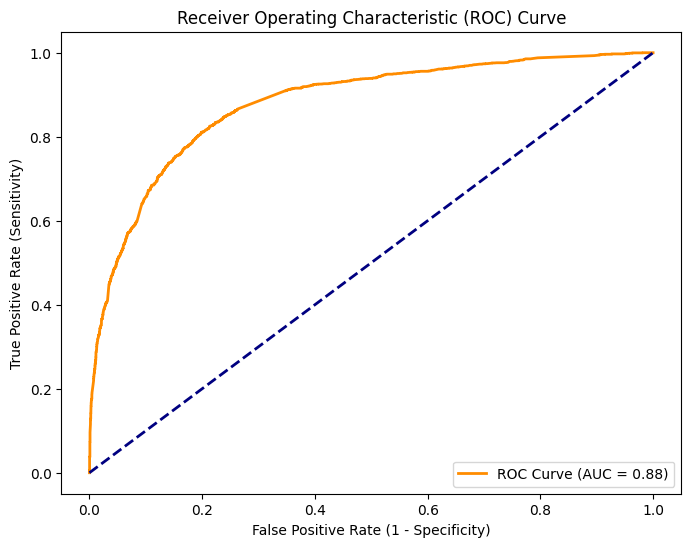

In [283]:
#predicted probabilities for the positive class
y_prob = y_train_pred_final.Lead_Score_Prob

#ROC curve and ROC area for the positive class
fpr, tpr, thresholds_roc = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

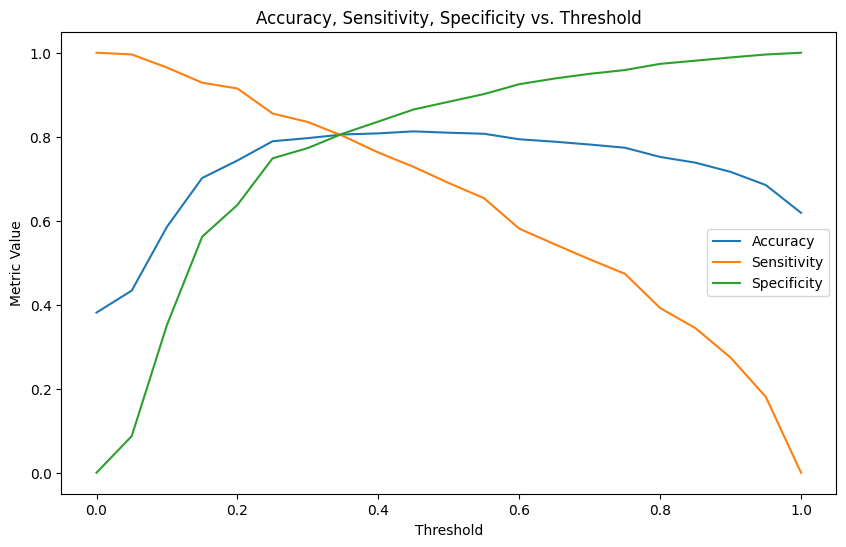

In [284]:
# Plot Accuracy, Sensitivity, Specificity with different thresholds
thresholds_range = np.arange(0, 1.05, 0.05)
accuracy_list = []
sensitivity_list = []
specificity_list = []

for threshold in thresholds_range:
    y_train_pred_final['predicted_threshold'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > threshold else 0)
    conf_matrix_threshold = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_threshold)
    accuracy = (conf_matrix_threshold[0, 0] + conf_matrix_threshold[1, 1]) / float(np.sum(conf_matrix_threshold))
    sensitivity = conf_matrix_threshold[1, 1] / float(conf_matrix_threshold[1, 1] + conf_matrix_threshold[1, 0])
    specificity = conf_matrix_threshold[0, 0] / float(conf_matrix_threshold[0, 0] + conf_matrix_threshold[0, 1])

    accuracy_list.append(accuracy)
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)

# Plot Accuracy, Sensitivity, Specificity vs. Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds_range, accuracy_list, label='Accuracy')
plt.plot(thresholds_range, sensitivity_list, label='Sensitivity')
plt.plot(thresholds_range, specificity_list, label='Specificity')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Accuracy, Sensitivity, Specificity vs. Threshold')
plt.legend()
plt.show()


In [285]:
# Find the cutoff point where metrics intersect
optimal_threshold = 0
min_difference = float('inf')

for i, (acc, sens, spec) in enumerate(zip(accuracy_list, sensitivity_list, specificity_list)):
    # Calculate the absolute differences between the metrics
    diff_acc_sens = abs(acc - sens)
    diff_acc_spec = abs(acc - spec)
    diff_sens_spec = abs(sens - spec)

    # Calculate the average difference
    avg_diff = (diff_acc_sens + diff_acc_spec + diff_sens_spec) / 3

    # Check if the average difference is the minimum encountered so far
    if avg_diff < min_difference:
        min_difference = avg_diff
        optimal_threshold = thresholds_range[i]

# Print the cutoff point
print(f"Intersection Cutoff Point: {optimal_threshold:.4f}")


Intersection Cutoff Point: 0.3500


In [286]:
# Update predictions based on the optimal cutoff
y_train_pred_final['predicted_optimal'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > optimal_threshold else 0)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,predicted,predicted_threshold,predicted_optimal
0,0,0.219948,0,0,0
1,0,0.186226,0,0,0
2,0,0.258486,0,0,0
3,0,0.827652,1,0,1
4,0,0.219948,0,0,0


In [287]:
#Assigning lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Lead_Score_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Lead_Score_Prob,predicted,predicted_threshold,predicted_optimal,Lead_Score
0,0,0.219948,0,0,0,22
1,0,0.186226,0,0,0,19
2,0,0.258486,0,0,0,26
3,0,0.827652,1,0,1,83
4,0,0.219948,0,0,0,22


In [288]:
# Confusion Matrix with the optimal cutoff
conf_matrix_optimal = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_optimal)
print("Confusion Matrix with Optimal Cutoff:")
print(conf_matrix_optimal)

Confusion Matrix with Optimal Cutoff:
[[3232  770]
 [ 489 1977]]


In [289]:
# Sensitivity, Specificity, Precision, Recall, and Accuracy
TP = conf_matrix_optimal[1, 1]  # True Positive
TN = conf_matrix_optimal[0, 0]  # True Negative
FP = conf_matrix_optimal[0, 1]  # False Positive
FN = conf_matrix_optimal[1, 0]  # False Negative

sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)
precision = TP / float(TP + FP)
accuracy = (TP + TN) / float(TP + TN + FP + FN)

print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (True Positive Rate): 0.80
Specificity (True Negative Rate): 0.81
Precision: 0.72
Accuracy: 0.81


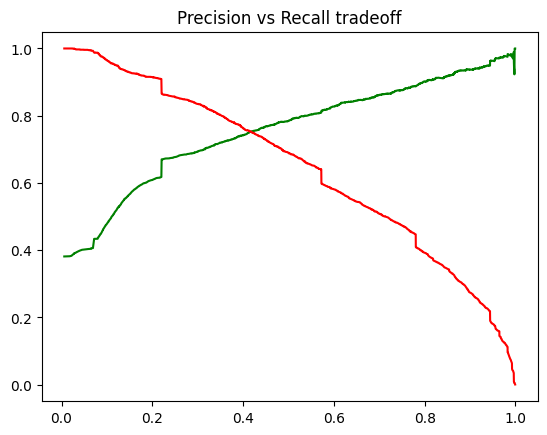

In [290]:
#Let us generate the Precision vs Recall tradeoff curve
p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final['Lead_Score_Prob'])
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

# Prediction on the Test Set

In [291]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Specialization_Rural and Agribusiness,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4269,0,0.954944,0,0,0,0,0,0,0,1,0,0,0,1,0
2376,0,-0.889974,1,0,0,0,0,0,0,1,0,0,0,1,0
7766,0,-0.782308,0,0,0,0,0,0,0,0,1,0,0,0,1
9199,0,-0.889974,0,1,0,1,0,0,0,1,0,0,0,0,0
4359,0,-0.889974,1,0,0,0,0,0,0,1,0,0,0,0,0


In [292]:
# adding constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Specialization_Rural and Agribusiness,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4269,1.0,0,0.954944,0,0,0,0,0,0,0,1,0,0,0,1,0
2376,1.0,0,-0.889974,1,0,0,0,0,0,0,1,0,0,0,1,0
7766,1.0,0,-0.782308,0,0,0,0,0,0,0,0,1,0,0,0,1
9199,1.0,0,-0.889974,0,1,0,1,0,0,0,1,0,0,0,0,0
4359,1.0,0,-0.889974,1,0,0,0,0,0,0,1,0,0,0,0,0


In [293]:
#check if train and test both have same features
X_train_sm.shape

(6468, 13)

In [294]:
X_test_sm.shape

(2772, 16)

In [295]:
# we can see that there is an extra column present in X_test that we dropped in X_train
#dropping the extra column
#cols_to_drop = ['What is your current occupation_Housewife', 'Last Notable Activity_Email Marked Spam']
cols_to_drop = ['What is your current occupation_Housewife', 'What is your current occupation_Working Professional','What is your current occupation_Student']
X_test_sm.drop(columns = cols_to_drop, inplace = True)
X_test_sm.shape

(2772, 13)

In [296]:
# make prediction
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]


4269    0.755993
2376    0.943990
7766    0.509346
9199    0.069201
4359    0.780335
9186    0.582339
1631    0.396008
8963    0.128648
8007    0.146680
5324    0.360746
dtype: float64

In [297]:
# convert y_test prediction to df and check head
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.755993
2376,0.943990
7766,0.509346
9199,0.069201
4359,0.780335


In [298]:
# convert actual y_test to df and check head
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [299]:
# merge both df

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.755993
1,1,0.943990
2,1,0.509346
3,0,0.069201
4,1,0.780335


In [300]:
#rename column 0 to lead_score_prob
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.755993
1,1,0.943990
2,1,0.509346
3,0,0.069201
4,1,0.780335


In [301]:
# make predictions using optimal cutoff
y_pred_final['Optimal_Prediction'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > optimal_threshold else 0)
y_pred_final.head()

,Converted,Conversion_Prob,Optimal_Prediction
0,1,0.755993,1
1,1,0.943990,1
2,1,0.509346,1
3,0,0.069201,0
4,1,0.780335,1


In [302]:
# Classification Report with the optimal cutoff
class_report_optimal = classification_report(y_pred_final.Converted, y_pred_final.Optimal_Prediction)
print("Classification Report of y test prediction with Optimal Cutoff:")
print(class_report_optimal)

Classification Report of y test prediction with Optimal Cutoff:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1677
           1       0.73      0.79      0.76      1095

    accuracy                           0.80      2772
   macro avg       0.79      0.80      0.80      2772
weighted avg       0.81      0.80      0.80      2772



In [303]:
#y_true is the actual labels and y_pred is the predicted labels
y_true = y_pred_final.Converted
y_pred = y_pred_final.Optimal_Prediction

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1359  318]
 [ 231  864]]


In [304]:
# calculate Sensivity, specifivity, precision and accuracy

TP = conf_matrix[1,1] # true positive
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives

sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)
precision = TP / float(TP + FP)
accuracy = (TP + TN) / float(TP + TN + FP + FN)

print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (True Positive Rate): 0.79
Specificity (True Negative Rate): 0.81
Precision: 0.73
Accuracy: 0.80


CONCLUSION: The prediction testing proves that the model can effectively detect hot leads. By using the optimal cutoff value, the model showed it could accurately identify hot leads. The classificatino report at the end gives a quick overview confirming that the model is pretty good at determining if a lead is hot or not.